In [13]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
# tf.config.experimental.enable_op_determinism()

In [14]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [15]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


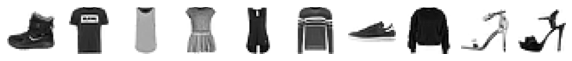

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [17]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='fashion')
    model.add(keras.layers.Flatten(input_shape=(28, 28), name='flatten'))   ## Batch Normalization
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))    ## Activation Function
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))
    return model

model = model_fn(keras.layers.Dropout(0.3))    ## Dropout

model.summary()

Model: "fashion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')   # Optimizer, Loss Function

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)   # Callback to save the best

history = model.fit(train_scaled, train_target, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb])        # epoch, batch_size

Epoch 1/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5881 - accuracy: 0.7936 - val_loss: 0.4186 - val_accuracy: 0.8527
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4381 - accuracy: 0.8428 - val_loss: 0.3814 - val_accuracy: 0.8637
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4020 - accuracy: 0.8527 - val_loss: 0.3745 - val_accuracy: 0.8640
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3833 - accuracy: 0.8602 - val_loss: 0.3472 - val_accuracy: 0.8767
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3637 - accuracy: 0.8665 - val_loss: 0.3420 - val_accuracy: 0.8737
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3488 - accuracy: 0.8727 - val_loss: 0.3355 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3404 - accuracy: 0.8746 - val_loss: 0.3317 - val_accuracy:

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


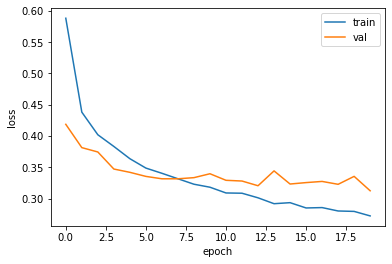

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [22]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 873us/step - loss: 0.3125 - accuracy: 0.8909


[0.3125297725200653, 0.890916645526886]

In [23]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8841


[0.33944830298423767, 0.8841000199317932]